# **Into the Space**
**Author: Saidur Rahman Sujon**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble._hist_gradient_boosting.gradient_boosting import train_test_split

# **Data Preprocessing**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Into the Space/train.csv')
df.info()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Into the Space/test.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [ ]:
cols_to_drop = ['Cabin','Name','Destination','HomePlanet']
df = df.drop(cols_to_drop, axis = 1)
df_test = df_test.drop(cols_to_drop, axis = 1)

In [ ]:
df.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Age           8514 non-null   float64
 3   VIP           8490 non-null   object 
 4   RoomService   8512 non-null   float64
 5   FoodCourt     8510 non-null   float64
 6   ShoppingMall  8485 non-null   float64
 7   Spa           8510 non-null   float64
 8   VRDeck        8505 non-null   float64
 9   Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(3)
memory usage: 619.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   CryoSleep     4184 non-null   object 
 2   Age           4186 non-null   f

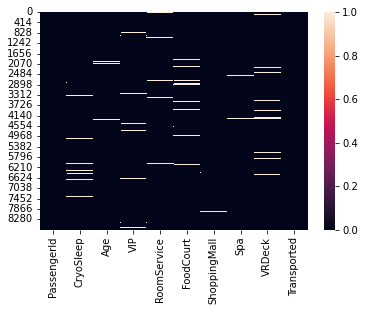

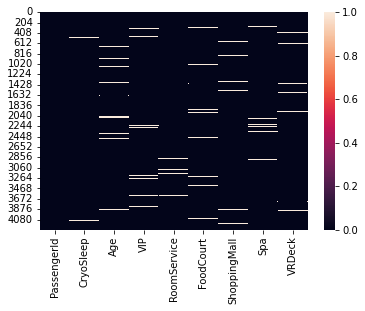

In [ ]:
sns.heatmap(df.isnull())
plt.show()

sns.heatmap(df_test.isnull())
plt.show()

In [ ]:
df = df.dropna()
df_test = df_test.dropna()

In [ ]:
df.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7251 entries, 0 to 8692
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   7251 non-null   object 
 1   CryoSleep     7251 non-null   object 
 2   Age           7251 non-null   float64
 3   VIP           7251 non-null   object 
 4   RoomService   7251 non-null   float64
 5   FoodCourt     7251 non-null   float64
 6   ShoppingMall  7251 non-null   float64
 7   Spa           7251 non-null   float64
 8   VRDeck        7251 non-null   float64
 9   Transported   7251 non-null   bool   
dtypes: bool(1), float64(6), object(3)
memory usage: 573.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3575 entries, 0 to 4276
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   3575 non-null   object 
 1   CryoSleep     3575 non-null   object 
 2   Age           3575 non-null   f

In [ ]:
df['CryoSleep'] = df['CryoSleep'].astype(int)
df['VIP'] = df['VIP'].astype(int)
df['Transported'] = df['Transported'].astype(int)
df['PassengerId'] = df['PassengerId'].astype(int)

df_test['CryoSleep'] = df_test['CryoSleep'].astype(int)
df_test['VIP'] = df_test['VIP'].astype(int)
df_test['PassengerId'] = df_test['PassengerId'].astype(int)

In [ ]:
df.loc[:1]

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,101,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,201,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7251 entries, 0 to 8692
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   7251 non-null   int64  
 1   CryoSleep     7251 non-null   int64  
 2   Age           7251 non-null   float64
 3   VIP           7251 non-null   int64  
 4   RoomService   7251 non-null   float64
 5   FoodCourt     7251 non-null   float64
 6   ShoppingMall  7251 non-null   float64
 7   Spa           7251 non-null   float64
 8   VRDeck        7251 non-null   float64
 9   Transported   7251 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 881.2 KB


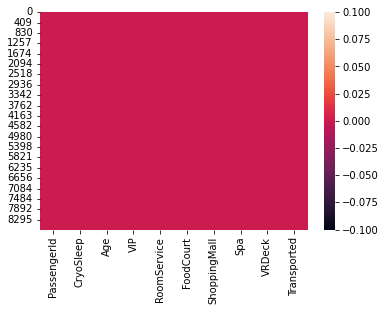

In [ ]:
df.info()
sns.heatmap(df.isnull())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3575 entries, 0 to 4276
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   3575 non-null   int64  
 1   CryoSleep     3575 non-null   int64  
 2   Age           3575 non-null   float64
 3   VIP           3575 non-null   int64  
 4   RoomService   3575 non-null   float64
 5   FoodCourt     3575 non-null   float64
 6   ShoppingMall  3575 non-null   float64
 7   Spa           3575 non-null   float64
 8   VRDeck        3575 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 279.3 KB


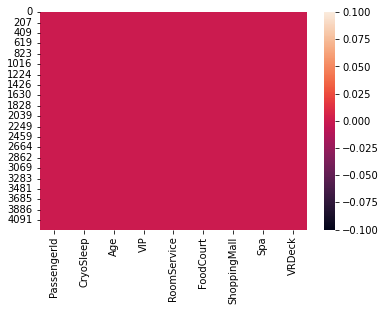

In [ ]:
df_test.info()
sns.heatmap(df_test.isnull())

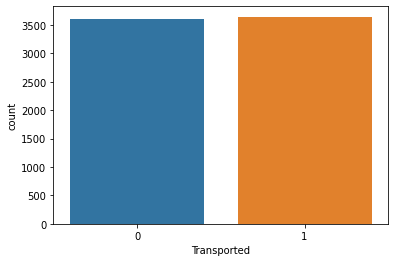

In [ ]:
sns.countplot(x=df['Transported'])
plt.show()

In [ ]:
df.describe()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,7251.000000,7251.000000,7251.000000,7251.000000,7251.000000,7251.000000,7251.000000,7251.000000,7251.000000,7251.000000
mean,465026.771204,0.351814,28.925665,0.024273,225.833678,472.685836,177.149635,317.951317,302.514274,0.502413
std,267108.340770,0.477569,14.484012,0.153905,667.393693,1645.329023,623.515689,1166.014213,1115.453565,0.500029
min,101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,235451.500000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,464101.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,690502.500000,1.000000,38.000000,0.000000,49.000000,80.000000,29.000000,65.000000,52.000000,1.000000
max,928002.000000,1.000000,79.000000,1.000000,14327.000000,29813.000000,23492.000000,22408.000000,20336.000000,1.000000


In [ ]:
df_test.describe()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,3575.000000,3575.000000,3575.000000,3575.000000,3575.000000,3575.000000,3575.000000,3575.000000,3575.000000
mean,463657.694825,0.370350,28.574266,0.017622,216.640559,432.939021,177.644755,297.389650,295.396643
std,271852.911968,0.482966,14.185813,0.131593,603.914557,1482.666307,562.827146,1076.437726,1157.034814
min,1301.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,224501.500000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,463901.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,705002.000000,1.000000,37.000000,0.000000,55.000000,75.000000,34.000000,50.000000,34.500000
max,927701.000000,1.000000,79.000000,1.000000,11567.000000,20809.000000,8292.000000,15733.000000,19086.000000


# **Building models and making predictions**


In [ ]:
X = df.drop(['Transported'], axis=1)
y = df['Transported']

X_Test_df = df_test

In [ ]:
print(X.shape)
print(y.shape)

print(X_Test_df.shape)

(7251, 9)
(7251,)
(3575, 9)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

**Decision Tree Classification**

In [ ]:
dt_clf = tree.DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train, y_train)
dtc_score = dt_clf.score(X_test, y_test)
print("Accuracy of Decision Tree Classifier: ",dtc_score)

Accuracy of Decision Tree Classifier:  0.7870434183321847


**Naive Bayes Classifier with Confusion Matrix**

Model accuracy Score: {0:0.5f} 0.6829772570640937
Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.41      0.56       716
           1       0.62      0.95      0.75       735

    accuracy                           0.68      1451
   macro avg       0.76      0.68      0.66      1451
weighted avg       0.76      0.68      0.66      1451

Confusion Matrix:


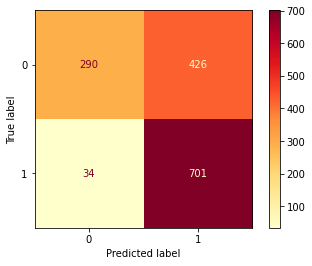

In [ ]:
classify_GNB = GaussianNB()
pred = classify_GNB.fit(X_train, y_train).predict(X_test)

print('Model accuracy Score: {0:0.5f}', format(accuracy_score(y_test, pred)))
print("Classification report: \n",classification_report(y_test, pred))

print("Confusion Matrix:")
ConfusionMatrixDisplay.from_predictions(y_test, pred, cmap='YlOrRd')
plt.show()

**K-Fold Cross Validation**

In [ ]:
k = 5
kf = KFold(n_splits=k)

#Evaluation metrics
accuracies = []
recalls = []
precisions = []

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

# Performing Kfold cross validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fitting the Naive Bayes model on the training data
    model = GaussianNB()
    model.fit(X_train, y_train)

    # Making prediction on test data
    y_pred = model.predict(X_test)

    AS = accuracy_score(y_test, y_pred)
    PS = precision_score(y_test, y_pred)
    RS = recall_score(y_test, y_pred)

    # Saving Evaluation metrics
    accuracies.append(AS)
    precisions.append(PS)
    recalls.append(RS)

# Average Evaluation Metrics Calculation
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)


print("Average Accuracy: ", avg_accuracy)
print("Average Precision: ", avg_precision)
print("Average Recall: ", avg_recall)

Average Accuracy:  0.6734255091613394
Average Precision:  0.6143882499202081
Average Recall:  0.9445183424691089


**Random Forest Classifier**

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_score = rf_clf.score(X_test, y_test)
print('Accuracy: ', rf_score)

Accuracy:  0.7772413793103449


**Gradient Boosting Classifier**

In [ ]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
gb_score = gb_clf.score(X_test, y_test)
print("Accuracy: ",gb_score)

Accuracy:  0.8022053756030324


In [ ]:
#Tuning the Gradient classifier
gb_clf = GradientBoostingClassifier(n_estimators=50)
gb_clf.fit(X_train,y_train)
gb_tune_score = gb_clf.score(X_test, y_test)
print(gb_tune_score)

0.8056512749827704


In [ ]:
# Prediction with GB model
predictions = gb_clf.predict(X_Test_df)
output_df = pd.DataFrame({"PassengerId": X_Test_df["PassengerId"], "Transported": predictions.astype(bool)})

In [ ]:
output_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3575 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  3575 non-null   int64
 1   Transported  3575 non-null   bool 
dtypes: bool(1), int64(1)
memory usage: 59.4 KB


In [ ]:
output_df.to_csv("submission.csv", index=False)

**Support Vector Machine(SVM)**

In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [ ]:
#Create a non-linear SVM model using the SVC class with a non-linear kernel (e.g., radial basis function):
svm = SVC(kernel='rbf', C=1.0, gamma='scale')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))


Accuracy: 0.48137931034482756
Precision: 0.48137931034482756
Recall: 1.0
F1 score: 0.6499068901303537


# **Evaluate the performance**